In [23]:
import pandas as pd
import os 
import tiktoken
import json
from src import utils 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Read Data and create the function for utils

In [2]:
root = "/datadrive/CuongHV/project/DATA/AMI_MS"
files = os.listdir(root)
len(files)

125

In [3]:
path = "/datadrive/CuongHV/project/DATA/AMI_MS/ES2010b.json"
with open(path, encoding="utf8") as f:
    jsondict = json.load(f)
jsondict


{'transcript': "Okay. Um welcome to our second meeting. This is the functional design meeting. And I hope you all had a good individual working time. Okay, let's get started. Okay, here's the agenda for the meeting. After the opening um I am going to fulfil the role of secretary, take the meeting minutes. And we're gonna have three presentations, one from each of you. Then we're gonna discuss some new project requirements. Um gonna come to a decision on the functions of the remote control. And then we're gonna close up the meeting. And we're gonna do this all in about forty minutes. Okay. First I want to discuss the goals of this meeting. First we need to determine the user requirements and the question that we can ask ourselves is what needs and desires are to be fulfilled by this remote control. And then we're going to determine the technical functions, what is the effect of the apparatus, what actually is it supposed to do, what do people pick up the remote and use it for. And then 

In [16]:
jsondict.keys()

dict_keys(['transcript', 'summary', 'actions', 'decisions', 'problems', 'pens', 'whiteboard', 'shared-doc'])

In [17]:
jsondict['shared-doc'].keys()

dict_keys(['txt', 'ppt', 'doc'])

In [4]:
def get_text_from_txt(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['txt']:
        filename = x['filename']
        content = x['content']
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs
o = get_text_from_txt(jsondict)
print(o)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
 ------------ 
 Received: from [139.222.1.2] by messenger
  (ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180

This is a multi-part message in MIME format.

------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable

For the documentation of the design project, you and all of your =
colleages are asked to fill out a short qu

In [15]:
import re

def clean_text(raw_text):
     # Replace multiple consecutive newlines (\n\n, \n\n\n, etc.) with a single \n
    cleaned_text = re.sub(r'\n{2,}', '\n', raw_text)
    # Remove extra spaces at the beginning of each line
    cleaned_text = re.sub(r'^ +', '', cleaned_text, flags=re.MULTILINE)
    return cleaned_text.strip()  # Remove leading/trailing spaces

# Example usage:
cleaned_content = clean_text(o)
print(cleaned_content)

ES2010docs.ES2010scen.participant2hBcComponents_design.ppt 
------------ 
Components Design
Presented by: Amber MacAdam, Industrial Designer
Basic Remote Operation:
Pressed button makes connection
Chip sense connection
Chip produces Morse-code infrared signal specific to that button
Transistors amplify the signal
Sensor on TV interprets the signal and responds accordingly
Findings-Required Materials for basic internal construction:
Rubber for buttons
Aluminium for battery contacts
Integrated circuit ‚Äìdiode, transistor, resonator, resistors, capacitor
Fiber glass and thin copper wire to create circuit board
LED
Contact disks for the buttons
Plastic for casing
Power source
Personal Preferences
To save money the components of the remote should be mass produced and the basic materials should be bought on mass
If we find another company who can produce the required chips, casing, LED and additional materials at a less expensive rate then we, ourselves, can we should go for it.
Suggested 

In [11]:
def get_text_from_doc(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['doc']:
        filename = x['filename']
        content = x['content']
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs
o = get_text_from_doc(jsondict)
print(o)

ES2010docs.ES2010scen.participant1hBcQuestionnairePost.doc 
 ------------ 
 Questionnaire after the meetings cycle 



Name: Amanda Olson

          

        Background information 

(Please place an ‚Äò*‚Äô next to your answers)

         

       1. Do you feel that the objectives for today‚Äôs meetings were generally attained? 

Never

Hardly ever 

Sometimes

Most of the times 

*Always

         

       2. Do you feel that the time for today‚Äôs meetings was generally well-spent? 

Never

Hardly ever 

Sometimes

*Most of the times 

Always

         

       3. Did you generally enjoy participating in today‚Äôs meetings? 

Never

Hardly ever 

Sometimes

*Most of the times 

Always

         

       4. Which of the following did you make use of before the meetings to prepare for the meetings (beside the instructions from your personal coach)? 

Minutes of the previous meeting(s)

Related documentation and information (e-mail, internet, project folder)

Agenda

*Personal recoll

In [12]:
def get_text_from_ppt(jsondict):
    outputs = []
    for x in jsondict['shared-doc']['ppt']:
        filename = x['filename']
        string = ['\n'.join(v) for k,v in x['content'].items()]
        content = '\n'.join(string)
        o = f'{filename} \n ------------ \n {content}'
        outputs.append(o)
    outputs = '\n'.join(outputs)
    return outputs 
o= get_text_from_ppt(jsondict)
print(o)

ES2010docs.ES2010scen.participant2hBcComponents_design.ppt 
 ------------ 
 Components Design
Presented by: Amber MacAdam, Industrial Designer
Basic Remote Operation:
Pressed button makes connection
Chip sense connection
Chip produces Morse-code infrared signal specific to that button
Transistors amplify the signal
Sensor on TV interprets the signal and responds accordingly
Findings-Required Materials for basic internal construction:
Rubber for buttons
Aluminium for battery contacts
Integrated circuit ‚Äìdiode, transistor, resonator, resistors, capacitor
Fiber glass and thin copper wire to create circuit board
LED
Contact disks for the buttons
Plastic for casing
Power source

Personal Preferences
To save money the components of the remote should be mass produced and the basic materials should be bought on mass
If we find another company who can produce the required chips, casing, LED and additional materials at a less expensive rate then we, ourselves, can we should go for it.
Suggest

In [13]:
# Extract text from txt, ppt, and doc
txt_content = get_text_from_txt(jsondict)
ppt_content = get_text_from_ppt(jsondict)
doc_content = get_text_from_doc(jsondict)
merged_content = txt_content + '\n' + ppt_content + '\n' + doc_content

print(merged_content)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
 ------------ 
 Received: from [139.222.1.2] by messenger
  (ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180

This is a multi-part message in MIME format.

------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable

For the documentation of the design project, you and all of your =
colleages are asked to fill out a short qu

In [16]:
merged_content_cleaned = clean_text(merged_content)
print(merged_content_cleaned)

ES2010docs.ES2010scen.Summaries.P1Sum1.txt 
------------ 
Received: from [139.222.1.2] by messenger
(ArGoSoft Mail Server Freeware, Version 1.8 (1.8.6.4)); Wed, 16 Feb 2005 11:38:33 +0000
Message-ID: <001701c5141c$46c6ca40$0201de8b@participant1>
From: "participant1" <participant1@ami>
To: <HeadOfDept@ami>
References: <01c5141a$Blat.v2.2.2$27b9dec8@messenger>
Subject: Re: Please summarise the last meeting
Date: Wed, 16 Feb 2005 11:40:11 -0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="----=_NextPart_000_0014_01C5141C.45E013C0"
X-Priority: 3
X-MSMail-Priority: Normal
X-Mailer: Microsoft Outlook Express 6.00.2900.2180
X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2900.2180
This is a multi-part message in MIME format.
------=_NextPart_000_0014_01C5141C.45E013C0
Content-Type: text/plain;
	charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable
For the documentation of the design project, you and all of your =
colleages are asked to fill out a short questionn

In [17]:
def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding_name = "cl100k_base"
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [18]:
num_tokens_from_string(merged_content_cleaned)


146918

# ETL data

In [3]:
root = "/datadrive/CuongHV/project/DATA/AMI_MS"
files = os.listdir(root)

In [20]:
print(f'{root}/{files[0]}')

/datadrive/CuongHV/project/DATA/AMI_MS/ES2004d.json


In [ ]:
data = []
for file in files:
    print(f"process {file}")
    # load json file
    path = f'{root}/{file}'
    with open(path, encoding="utf8") as f:
        jsondict = json.load(f)
    # Transcripts
    transcripts_cleaned = utils.clean_text(jsondict['transcript'])
    num_tokens_transcripts = utils.num_tokens_from_string(transcripts_cleaned)

    # Summary
    summary_cleaned = utils.clean_text(jsondict['summary'])
    num_tokens_summary = utils.num_tokens_from_string(summary_cleaned)

    # Shared doc
        # Extract text from txt, ppt, and doc
    try:
        txt_content = utils.get_text_from_txt(jsondict)
    except:
        txt_content = ''
    try:
        ppt_content = utils.get_text_from_ppt(jsondict)
    except:
        ppt_content = ''
    try:
        doc_content = utils.get_text_from_doc(jsondict)
    except:
        doc_content = ''
    merged_content = txt_content + '\n' + ppt_content + '\n' + doc_content
        # Clean text
    merged_content_cleaned = utils.clean_text(merged_content)
        # Count tokens
    num_tokens_shared_doc = utils.num_tokens_from_string(merged_content_cleaned)

    # Save to dataframe
    data.append({
        'file': file,
        'num_tokens_transcripts': num_tokens_transcripts,
        'num_tokens_summary': num_tokens_summary,
        'num_tokens_shared_doc': num_tokens_shared_doc
    })

    # Save as cleaned json
    cleaned_jsondict = {
        "transcript": transcripts_cleaned,
        "summary": summary_cleaned,
        "actions": jsondict['actions'],
        "decisions": jsondict['decisions'],
        "problems": jsondict['problems'],
        "shared-doc": merged_content_cleaned
    }
    with open(f"/datadrive/CuongHV/project/DATA/AMI_MS_Cleaned/{file}", "w", encoding="utf8") as f:
        json.dump(cleaned_jsondict, f, ensure_ascii=False, indent=4)
    print(f'{file} done')
# Convert to DF and save as CSV 
columns = ["file", "num_tokens_transcripts", "num_tokens_summary", "num_tokens_shared_doc"]
df = pd.DataFrame(data)
df.to_csv("token_data.csv", mode="w", header=True, index=False,columns=columns)

process ES2004d.json
ES2004d.json done
process ES2008b.json
ES2008b.json done
process IS1000b.json
IS1000b.json done
process IS1004d.json
IS1004d.json done
process IS1008a.json
IS1008a.json done
process ES2015b.json
ES2015b.json done
process IS1004a.json
IS1004a.json done
process TS3011b.json
TS3011b.json done
process ES2015d.json
ES2015d.json done
process IS1005b.json
IS1005b.json done
process ES2008c.json
ES2008c.json done
process TS3003a.json
TS3003a.json done
process ES2013d.json
ES2013d.json done
process ES2008d.json
ES2008d.json done
process ES2013c.json
ES2013c.json done
process ES2015c.json
ES2015c.json done
process IS1006d.json
IS1006d.json done
process IS1006c.json
IS1006c.json done
process IS1005a.json
IS1005a.json done
process ES2006d.json
ES2006d.json done
process ES2004b.json
ES2004b.json done
process TS3008a.json
TS3008a.json done
process ES2009d.json
ES2009d.json done
process IS1005c.json
IS1005c.json done
process TS3003b.json
TS3003b.json done
process TS3010b.json
TS30

# EDA

In [28]:
path = "/datadrive/CuongHV/project/mm_agenda_generation_research/EDA/token_data.csv"
df = pd.read_csv(path)
df.head()

file  num_tokens_transcripts  num_tokens_summary  \
0  ES2004d.json                   11420                 176   
1  ES2008b.json                   10489                 153   
2  IS1000b.json                   11094                 228   
3  IS1004d.json                    8416                 203   
4  IS1008a.json                    5233                 161   

   num_tokens_shared_doc  
0                 131699  
1                 133296  
2                      0  
3                  14540  
4                   7285

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   file                    125 non-null    object
 1   num_tokens_transcripts  125 non-null    int64 
 2   num_tokens_summary      125 non-null    int64 
 3   num_tokens_shared_doc   125 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.0+ KB


In [29]:
# Calculate statistics
def get_stats(df):
    stats = df[['num_tokens_transcripts', 'num_tokens_summary', 'num_tokens_shared_doc']].describe().T
    stats['median'] = df[['num_tokens_transcripts', 'num_tokens_summary', 'num_tokens_shared_doc']].median()

    # Rename columns for clarity
    stats = stats.rename(columns={
        'min': 'Min',
        'max': 'Max',
        'mean': 'Mean',
        '50%': 'Median',
        'std': 'Std Dev'
    })

    # Select relevant columns
    stats = stats[['Min', 'Max', 'Mean', 'median', 'Std Dev']]
    return stats
print(get_stats(df))

                           Min       Max       Mean  median       Std Dev
num_tokens_transcripts  1324.0   16035.0   8277.664  8424.0   3288.116148
num_tokens_summary        43.0     608.0    182.392   185.0     58.693421
num_tokens_shared_doc      0.0  146918.0  27825.280  3775.0  50441.990765


In [30]:
get_stats(df)

Min       Max       Mean  median       Std Dev
num_tokens_transcripts  1324.0   16035.0   8277.664  8424.0   3288.116148
num_tokens_summary        43.0     608.0    182.392   185.0     58.693421
num_tokens_shared_doc      0.0  146918.0  27825.280  3775.0  50441.990765

D·ªØ li·ªáu g·ªìm ba lo·∫°i token: Transcripts, Summary, v√† Shared Doc, v·ªõi c√°c ch·ªâ s·ªë th·ªëng k√™ nh∆∞ sau:

1. S·ªë l∆∞·ª£ng token trong Transcripts (num_tokens_transcripts)
Ph·∫°m vi: Dao ƒë·ªông t·ª´ 1,324 ƒë·∫øn 16,035 token.
Trung b√¨nh: Kho·∫£ng 8,278 token, nh∆∞ng gi√° tr·ªã trung v·ªã (8,424) g·∫ßn v·ªõi trung b√¨nh, cho th·∫•y ph√¢n ph·ªëi kh√° c√¢n b·∫±ng.
ƒê·ªô l·ªách chu·∫©n: 3,288, cho th·∫•y c√≥ s·ª± ph√¢n t√°n nh·∫•t ƒë·ªãnh nh∆∞ng kh√¥ng qu√° l·ªõn.
üîπ Nh·∫≠n x√©t: H·∫ßu h·∫øt c√°c ƒëo·∫°n h·ªôi tho·∫°i c√≥ ƒë·ªô d√†i t∆∞∆°ng ƒë·ªëi ƒë·ªìng ƒë·ªÅu, nh∆∞ng v·∫´n c√≥ m·ªôt s·ªë h·ªôi tho·∫°i r·∫•t d√†i (tr√™n 16,000 token) v√† m·ªôt s·ªë r·∫•t ng·∫Øn (1,324 token).
2. S·ªë l∆∞·ª£ng token trong Summary (num_tokens_summary)
Ph·∫°m vi: T·ª´ 43 ƒë·∫øn 608 token.
Trung b√¨nh: 182 token, trong khi trung v·ªã l√† 185, r·∫•t g·∫ßn v·ªõi trung b√¨nh.
ƒê·ªô l·ªách chu·∫©n: 58.7, cho th·∫•y m·ª©c ƒë·ªô ph√¢n t√°n th·∫•p.
üîπ Nh·∫≠n x√©t: C√°c b·∫£n t√≥m t·∫Øt c√≥ k√≠ch th∆∞·ªõc kh√° ƒë·ªìng nh·∫•t, v·ªõi ph·∫ßn l·ªõn n·∫±m trong kho·∫£ng 100-200 token.
3. S·ªë l∆∞·ª£ng token trong Shared Doc (num_tokens_shared_doc)
Ph·∫°m vi: T·ª´ 0 ƒë·∫øn 146,918 token, v·ªõi trung b√¨nh 27,825 v√† trung v·ªã 3,775.
ƒê·ªô l·ªách chu·∫©n: 50,441, r·∫•t cao, cho th·∫•y s·ª± ph√¢n t√°n d·ªØ li·ªáu l·ªõn.
üîπ Nh·∫≠n x√©t:
M·ªôt s·ªë t√†i li·ªáu c√≥ s·ªë l∆∞·ª£ng token c·ª±c l·ªõn (h∆°n 100,000 token), trong khi m·ªôt s·ªë kh√¥ng c√≥ t√†i li·ªáu chia s·∫ª (0 token).
Trung b√¨nh cao nh∆∞ng trung v·ªã th·∫•p cho th·∫•y ph·∫ßn l·ªõn t√†i li·ªáu c√≥ s·ªë token nh·ªè, nh∆∞ng c√≥ m·ªôt s·ªë gi√° tr·ªã r·∫•t l·ªõn k√©o trung b√¨nh l√™n cao.
T√≥m t·∫Øt t·ªïng quan
Transcripts c√≥ s·ª± ph√¢n t√°n v·ª´a ph·∫£i, ph·∫£n √°nh ƒë·ªô d√†i h·ªôi tho·∫°i kh√°c nhau.
Summary c√≥ ph√¢n b·ªë kh√° ƒë·ªìng ƒë·ªÅu, kh√¥ng c√≥ s·ª± ch√™nh l·ªách l·ªõn gi·ªØa c√°c t·ªáp.
Shared Doc c√≥ s·ª± ph√¢n t√°n c·ª±c l·ªõn, v·ªõi m·ªôt s·ªë t·ªáp c√≥ r·∫•t nhi·ªÅu token v√† m·ªôt s·ªë kh√¥ng c√≥ d·ªØ li·ªáu.
Ph√¢n ph·ªëi d·ªØ li·ªáu n√†y cho th·∫•y h·ªôi tho·∫°i c√≥ th·ªÉ c√≥ ƒë·ªô d√†i ƒëa d·∫°ng, t√≥m t·∫Øt ƒë∆∞·ª£c chu·∫©n h√≥a v·ªõi k√≠ch th∆∞·ªõc nh·∫•t ƒë·ªãnh, v√† t√†i li·ªáu chia s·∫ª c√≥ s·ª± ch√™nh l·ªách r·∫•t l·ªõn gi·ªØa c√°c t·ªáp.

In [18]:
# remove 0 values
df_non_0 = df[(df['num_tokens_transcripts'] > 0) & (df['num_tokens_summary'] > 0) & (df['num_tokens_shared_doc'] > 0)]
print(get_stats(df_non_0))


                           Min       Max          Mean   median       Std Dev
num_tokens_transcripts  1324.0   13591.0   7818.432836   7963.0   3161.115670
num_tokens_summary        43.0     608.0    177.059701    179.0     70.499061
num_tokens_shared_doc   2394.0  146918.0  51912.835821  12466.0  59253.504750


In [37]:
100000/14000

7.142857142857143

In [20]:
df_non_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 123
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   file                    67 non-null     object
 1   num_tokens_transcripts  67 non-null     int64 
 2   num_tokens_summary      67 non-null     int64 
 3   num_tokens_shared_doc   67 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


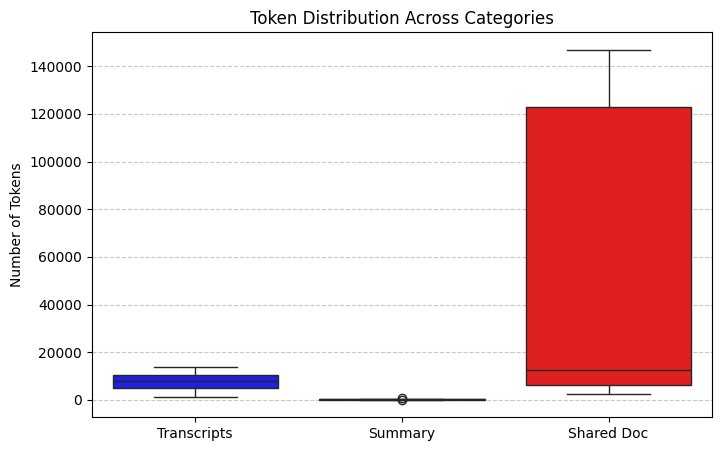

In [ ]:
import seaborn as sns
import pandas as pd

# V·∫Ω bi·ªÉu ƒë·ªì h·ªôp (Boxplot) ƒë·ªÉ hi·ªÉn th·ªã ph√¢n ph·ªëi d·ªØ li·ªáu
plt.figure(figsize=(8, 5))
sns.boxplot(df_non_0, palette=["blue", "green", "red"])
# G√°n nh√£n
plt.xticks([0, 1, 2], ["Transcripts", "Summary", "Shared Doc"])
plt.ylabel("Number of Tokens")
plt.title("Token Distribution Across Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()



1. S·ªë l∆∞·ª£ng token trong Transcripts (num_tokens_transcripts)
Ph·∫°m vi: T·ª´ 1,324 ƒë·∫øn 13,591 token.
Trung b√¨nh: 7,818 token.
Trung v·ªã: 7,963 token, kh√° g·∫ßn v·ªõi trung b√¨nh, cho th·∫•y ph√¢n ph·ªëi kh√° c√¢n ƒë·ªëi.
ƒê·ªô l·ªách chu·∫©n: 3,161, th·ªÉ hi·ªán m·ª©c ƒë·ªô bi·∫øn ƒë·ªông v·ª´a ph·∫£i.

üîπ Nh·∫≠n x√©t:
C√°c h·ªôi tho·∫°i c√≥ ƒë·ªô d√†i kh√° ƒëa d·∫°ng, nh∆∞ng kh√¥ng qu√° l·ªách v·ªÅ m·ªôt ph√≠a.
ƒê·ªô l·ªách chu·∫©n kh√¥ng qu√° cao, cho th·∫•y ƒë·ªô d√†i h·ªôi tho·∫°i c√≥ s·ª± nh·∫•t qu√°n nh·∫•t ƒë·ªãnh.

2. S·ªë l∆∞·ª£ng token trong Summary (num_tokens_summary)
Ph·∫°m vi: T·ª´ 43 ƒë·∫øn 608 token.
Trung b√¨nh: 177 token.
Trung v·ªã: 179 token, g·∫ßn v·ªõi trung b√¨nh.
ƒê·ªô l·ªách chu·∫©n: 70.5, m·ª©c ƒë·ªô bi·∫øn ƒë·ªông t∆∞∆°ng ƒë·ªëi th·∫•p.

üîπ Nh·∫≠n x√©t:
C√°c b·∫£n t√≥m t·∫Øt c√≥ ƒë·ªô d√†i t∆∞∆°ng ƒë·ªëi ·ªïn ƒë·ªãnh, dao ƒë·ªông ch·ªß y·∫øu quanh m·ª©c trung b√¨nh.
M·ªôt s·ªë b·∫£n t√≥m t·∫Øt d√†i h∆°n (tr√™n 600 token), nh∆∞ng ph·∫ßn l·ªõn n·∫±m trong kho·∫£ng 100-200 token.

3. S·ªë l∆∞·ª£ng token trong Shared Doc (num_tokens_shared_doc)
Ph·∫°m vi: T·ª´ 2,394 ƒë·∫øn 146,918 token, cho th·∫•y s·ª± ch√™nh l·ªách r·∫•t l·ªõn.
Trung b√¨nh: 51,912 token.
Trung v·ªã: 12,466 token, th·∫•p h∆°n nhi·ªÅu so v·ªõi trung b√¨nh, cho th·∫•y c√≥ m·ªôt s·ªë gi√° tr·ªã c·ª±c l·ªõn k√©o trung b√¨nh l√™n cao.
ƒê·ªô l·ªách chu·∫©n: 59,253, c·ª±c k·ª≥ cao, ph·∫£n √°nh s·ª± bi·∫øn ƒë·ªông l·ªõn.

üîπ Nh·∫≠n x√©t:
D·ªØ li·ªáu c√≥ s·ª± ph√¢n t√°n m·∫°nh, v·ªõi m·ªôt s·ªë t√†i li·ªáu r·∫•t l·ªõn (tr√™n 100,000 token), trong khi ph·∫ßn l·ªõn c√≥ s·ªë token nh·ªè h∆°n nhi·ªÅu.
Trung v·ªã ch·ªâ kho·∫£ng 12,466, nghƒ©a l√† h∆°n m·ªôt n·ª≠a s·ªë t√†i li·ªáu c√≥ s·ªë token kh√° th·∫•p.
S·ª± ch√™nh l·ªách n√†y c√≥ th·ªÉ do m·ªôt s·ªë t·ªáp ch·ª©a t√†i li·ªáu r·∫•t d√†i, trong khi ph·∫ßn l·ªõn c√°c t·ªáp kh√°c ng·∫Øn h∆°n nhi·ªÅu.

T√≥m t·∫Øt t·ªïng quan

Transcripts c√≥ s·ª± ph√¢n b·ªë t∆∞∆°ng ƒë·ªëi c√¢n ƒë·ªëi, kh√¥ng qu√° l·ªách v·ªÅ ph√≠a h·ªôi tho·∫°i qu√° d√†i hay qu√° ng·∫Øn.
Summary kh√° ƒë·ªìng ƒë·ªÅu, v·ªõi ƒë·ªô d√†i kh√¥ng dao ƒë·ªông qu√° l·ªõn gi·ªØa c√°c t·ªáp.
Shared Doc c√≥ s·ª± ph√¢n t√°n c·ª±c cao, v·ªõi m·ªôt s·ªë t√†i li·ªáu r·∫•t l·ªõn k√©o trung b√¨nh l√™n cao, trong khi ph·∫ßn l·ªõn t√†i li·ªáu c√≥ s·ªë token th·∫•p h∆°n nhi·ªÅu.
Ph√¢n ph·ªëi n√†y cho th·∫•y s·ª± kh√°c bi·ªát l·ªõn v·ªÅ k√≠ch th∆∞·ªõc t√†i li·ªáu chia s·∫ª, trong khi h·ªôi tho·∫°i v√† t√≥m t·∫Øt c√≥ xu h∆∞·ªõng ·ªïn ƒë·ªãnh h∆°n. 